In [ ]:
from sklearn.datasets import make_blobs
import pandas as pd #data processing
import numpy as np
import math
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt


*`•`* Task 1: Implement data load function for fixed length (10 points)


In [ ]:
# from google.colab import files
# files.upload()

data=pd.read_csv('train 2.csv')
datas=pd.DataFrame(data.iloc[:,0:])
data.columns=list(data.iloc[:,0:].columns)
datas['class']=data['class']
data_drop=datas.drop('class',axis=1)
X=data_drop.values
Y=datas['class']#.map({'M":1, "B":0})

print(X)
print('\n\n')
print(Y)

[[-1. -1. -1. ... -1. 40. 24.]
 [-1. -1.  1. ... -1. -1. -1.]
 [-1. -1.  1. ... -1. -1. -1.]
 ...
 [ 1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]]



0       0
1       0
2       0
3       0
4       0
       ..
6386    1
6387    1
6388    1
6389    1
6390    1
Name: class, Length: 6391, dtype: int64


• Task 3: Implement K-means clustering or any ML algorithms (25 points)


In [ ]:
from keras.models import Sequential,Model
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state=99)

clfSVC=Sequential()
clfSVC=SVC(gamma='auto')
clfSVC.fit(x_train, y_train)
predictSVC = clfSVC.predict(x_test)
scoreSVC = accuracy_score(y_test, predictSVC)
print('svm prediction score: %s' % scoreSVC)


svm prediction score: 0.9078125


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state=99)

clfLog=Sequential()
clfLog=LogisticRegression(max_iter=100000)
clfLog.fit(x_train, y_train)
predictLog = clfLog.predict(x_test)
scoreLog = accuracy_score(y_test, predictLog)
print('LogisticRegression prediction score: %s' % scoreLog)

LogisticRegression prediction score: 0.9890625


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state=99)

clfRnd=Sequential()
clfRnd=RandomForestClassifier()
clfRnd.fit(x_train, y_train)
predictRnd = clfLog.predict(x_test)
scoreRnd = accuracy_score(y_test, predictRnd)
print('RandomForestClassifier prediction score: %s' % scoreRnd)

RandomForestClassifier prediction score: 0.9890625


• Task 4: Visualize clustering or hidden representation of ML algorithm results (20 points)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,verbose=1, perplexity=40, _iter=30)##n_iter 높이니까 조금 뭉치는듯..?
X_2d=tsne.fit_transform(X)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


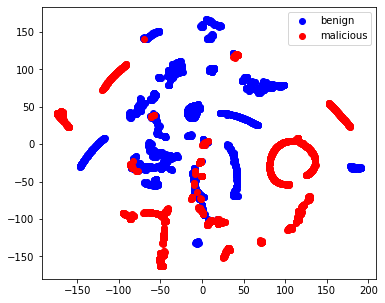

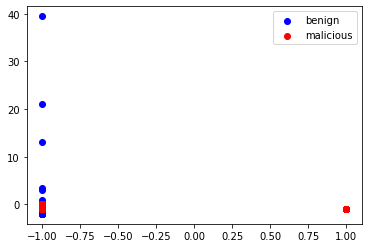

In [ ]:
plt.figure(figsize=(6, 5))

for i,c,l in zip([0,1],['b','r'],['benign','malicious']):
  plt.scatter(X_2d[Y==i,0],X_2d[Y==i,1],c=c,label=l)
  ## Y==0인것의 x좌표->x Y==0의 y좌표->y
  ## Y==1인것의 x좌표->x Y==1의 y좌표->y


  
plt.legend()
plt.show()



for i,c,l in zip([0,1],['b','r'],['benign','malicious']):
  plt.scatter(X[Y==i,0],X[Y==i,1],c=c,label=l)

plt.legend()
plt.show()


2. 클러스터링


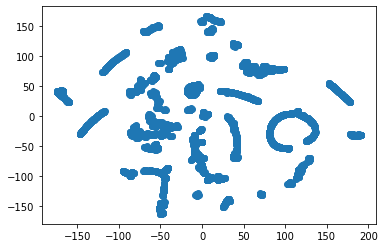

In [ ]:
from sklearn.cluster import KMeans

plt.scatter(X_2d[:,0], X_2d[:,1])
plt.show()

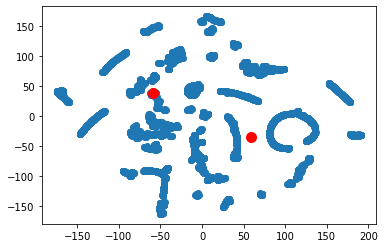

In [ ]:
## clusters의 갯수 정하는과정 하지만 우린 benign/malicious만 구별하므로 클러스터는2개로하자..

# wcss = []
# for i in range(1, 11):
#     kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
#     kmeans.fit(X)
#     wcss.append(kmeans.inertia_)

# plt.plot(range(1, 11), wcss)
# plt.title('Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')
# plt.show()


kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X_2d)
plt.scatter(X_2d[:,0], X_2d[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='r')
plt.show()

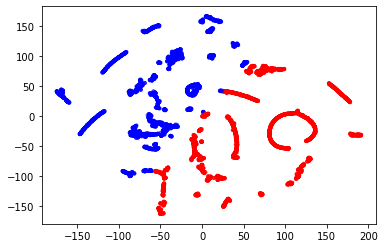

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
# k means
kmeans = KMeans(n_clusters=2, random_state=0)
data['cluster'] = kmeans.fit_predict(X_2d)


# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]


## add to df
data['cen_x'] = data.cluster.map({0:cen_x[0], 1:cen_x[1]})
data['cen_y'] = data.cluster.map({0:cen_y[0], 1:cen_y[1]})


# define and map colors
colors = ['b','r'] ##benign:blue, malicious: red
data['c'] = data.cluster.map({0:colors[0], 1:colors[1]})

import matplotlib.pyplot as plt
plt.scatter(X_2d[:,0], X_2d[:,1], c=data.c, alpha = 0.6, s=10)

곡선형일때 tsne가좋고 선형이면 pca가좋다함
pca 내일 찾아보기
